Justin and Laila

In [75]:
#We first need to import all of the necessary libraries in order to be able to perform our work and do our ERDs.

import sqlite3 #importing SQL
import pandas as pd #importing Pandas
import numpy as np #importing numpy
from scipy import stats #importing Scipy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib
from pandasql import sqldf #to querry databases directly with SQL syntax
%matplotlib inline

In [76]:
df_info = pd.read_csv("../../data/rt.movie_info.tsv.gz", sep='\t')

In [77]:
df_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [78]:
df_reviews = pd.read_csv("../../data/rt.reviews.tsv.gz", sep='\t', engine = 'python')

In [79]:
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [80]:
df_tmdb = pd.read_csv("../../data/tmdb.movies.csv.gz")

In [81]:
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [82]:
conn = sqlite3.connect('../../data/im.db')

In [83]:
conn

In [84]:
df = pd.read_sql("""SELECT * FROM principals;""", conn)

In [85]:
df

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [86]:
df_budget = pd.read_csv("../../data/tn.movie_budgets.csv.gz")

In [87]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [88]:
df_bom = pd.read_csv("../../data/bom.movie_gross.csv.gz")
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [89]:
#joining tables movie_basics and movie_ratings pulling average rating and runtime
joined_tables_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY averagerating
ORDER BY runtime_minutes DESC
;
""", conn)

In [90]:
joined_tables_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
1,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
3,tt0464162,Komaram Puli,Komaram Puli,2010,163.0,"Action,Crime,Thriller",3.8,1423
4,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
...,...,...,...,...,...,...,...,...
86,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
87,tt0977643,Chooriyan,Chooriyan,2015,NaN,"Drama,Musical,Romance",4.4,7
88,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
89,tt1555187,Campamento Flipy,Campamento Flipy,2010,NaN,Comedy,2.0,164


In [91]:
# Filter out movies with a specific condition, e.g., only movies with ratings >= 8
highly_rated_movies = joined_tables_df[joined_tables_df['averagerating'] >= 8]
highly_rated_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
6,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,9.9,417
10,tt0464032,"Guns, Drugs and Dirty Money","Guns, Drugs and Dirty Money",2010,123.0,"Action,Comedy,Crime",8.0,39
11,tt0436782,A Life in the Death of Joe Meek,A Life in the Death of Joe Meek,2013,122.0,Documentary,9.1,24
14,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8
16,tt10080924,Sweater,Sweater,2019,118.0,Drama,9.2,79
24,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
25,tt10121022,Freie Räume,Freie Räume,2019,102.0,Documentary,9.7,7
47,tt0825334,Caravaggio and My Mother the Pope,Caravaggio and My Mother the Pope,2018,90.0,"Comedy,Drama",8.9,51
61,tt0430524,The Rescuer,The Rescuer,2011,84.0,Documentary,8.7,14


In [92]:
# displaying movies of an average rating of 3 or less
poorly_rated_movies = joined_tables_df[joined_tables_df['averagerating'] <= 3]
poorly_rated_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
13,tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449
15,tt1865374,Futures Past,Futures Past,2012,120.0,"Action,Biography,History",1.3,33
22,tt1316037,Birdemic: Shock and Terror,Birdemic: Shock and Terror,2010,105.0,"Action,Comedy,Drama",1.8,19137
28,tt10214842,Milliard,Milliard,2019,101.0,"Comedy,Crime,Thriller",2.6,189
33,tt0875613,Rift,Rift,2011,100.0,"Horror,Thriller",2.7,404
34,tt0484828,La daga de Rasputín,La daga de Rasputín,2011,99.0,"Adventure,Comedy",3.0,186
35,tt0996958,Legend of the Red Reaper,Legend of the Red Reaper,2013,99.0,"Action,Adventure,Fantasy",2.2,495
43,tt0887143,Hyenas,Hyenas,2011,92.0,Horror,2.8,952
44,tt1624391,Killer Bitch,Killer Bitch,2010,92.0,Thriller,1.5,437
46,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248


In [93]:
# Filter out movies with a runtime of more than 120 minutes
long_movies = joined_tables_df[joined_tables_df['runtime_minutes'] > 120]
long_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
1,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
3,tt0464162,Komaram Puli,Komaram Puli,2010,163.0,"Action,Crime,Thriller",3.8,1423
4,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
5,tt0403935,Action Jackson,Action Jackson,2014,144.0,"Action,Thriller",3.3,2862
6,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,9.9,417
7,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action,6.4,16
8,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
9,tt0253093,Gangavataran,Gangavataran,2018,134.0,None,6.6,8


In [94]:
#displaying movies of a runtime of less than 120 minutes
short_movies = joined_tables_df[joined_tables_df['runtime_minutes'] < 120]
short_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
16,tt10080924,Sweater,Sweater,2019,118.0,Drama,9.2,79
17,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300
18,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
19,tt0419692,Disconnect,Disconnect,2010,112.0,"Drama,Mystery,Sci-Fi",4.5,190
20,tt0330987,"Tiden är en dröm, del 2","Tiden är en dröm, del 2",2014,109.0,None,6.3,6
...,...,...,...,...,...,...,...,...
76,tt2498292,Under a Jarvis Moon,Under a Jarvis Moon,2010,56.0,Documentary,9.5,6
77,tt0460528,One Step Beyond: The True Story of Géraldine F...,One Step Beyond,2012,56.0,Documentary,8.5,26
78,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
79,tt10015432,Forest of the Dead Sharks,Forest of the Dead Sharks,2019,50.0,"Action,Comedy,Horror",8.4,23


In [95]:
# Custom bins for runtime ranges. shows the average rating of movies within each bin
bins = [0, 60, 90, 120, 150, float('inf')]  
labels = ['<60', '60-89', '90-119', '120-149', '150+']
joined_tables_df['runtime_bin'] = pd.cut(joined_tables_df['runtime_minutes'], bins=bins, labels=labels)
average_rating_by_runtime_bin = joined_tables_df.groupby('runtime_bin')['averagerating'].mean()

print(average_rating_by_runtime_bin)

runtime_bin
<60        8.166667
60-89      4.917857
90-119     4.990909
120-149    6.444444
150+       7.100000
Name: averagerating, dtype: float64


In [96]:
#this shows how many movies are in each 'bin' so we can see the more popular runtimes
joined_tables_df['runtime_bin'] = pd.cut(joined_tables_df['runtime_minutes'], bins=bins, labels=labels)
movie_count_by_runtime_bin = joined_tables_df['runtime_bin'].value_counts().sort_index()
movie_count_by_runtime_bin

<60         6
60-89      28
90-119     33
120-149     9
150+        5
Name: runtime_bin, dtype: int64

An initial comparison of ratings & runtime showed no relationship

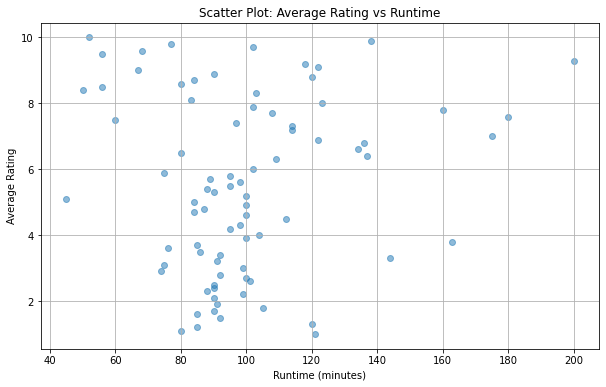

In [105]:
# Created a scatter plot comparing the average rating and the runtime in minutes
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(joined_tables_df['runtime_minutes'], joined_tables_df['averagerating'], alpha=0.5)
plt.title('Scatter Plot: Average Rating vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [106]:
# calculating the correlation between runtime and average rating
correlation = joined_tables_df['runtime_minutes'].corr(joined_tables_df['averagerating'])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.08901318429856621


A potential trend of shorter length films having higher ratings emerged

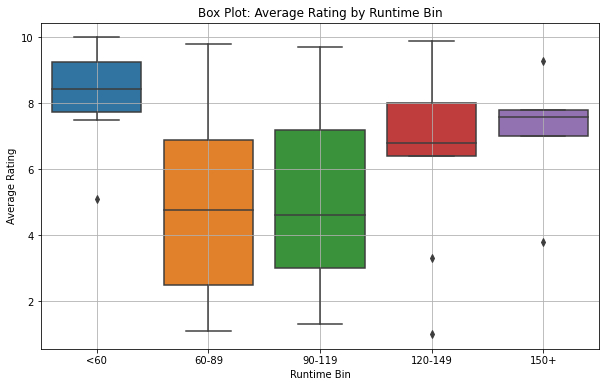

In [99]:
# Custom bins for runtime ranges to create categories in box plot
 
bins = [0, 60, 90, 120, 150, float('inf')]  
labels = ['<60', '60-89', '90-119', '120-149', '150+']
joined_tables_df['runtime_bin'] = pd.cut(joined_tables_df['runtime_minutes'], bins=bins, labels=labels)

# Created a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=joined_tables_df, x='runtime_bin', y='averagerating')
plt.title('Box Plot: Average Rating by Runtime Bin')
plt.xlabel('Runtime Bin')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [108]:
#joining the tables and specifying that average rating should be greater than or equal to 8

joined_tables_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE averagerating >= 8
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn)

In [109]:
# split the genres and added a space in order to use the explode function 
joined_tables_df['genres'] = joined_tables_df['genres'].str.split(",") 


In [110]:
#using the split function so that the genres are separate - rather than having multiple genres relate to one movie
genres_split_df=joined_tables_df.explode('genres') 

In [112]:
# used explode fucntion to seperate movies based on genres
genres_split_df['genres'].value_counts() # the value counts shows us the genre categories and the the counts


Drama          147
Documentary    123
Comedy         116
Adventure       72
Action          71
Mystery         59
Thriller        58
Romance         54
Fantasy         53
Family          52
History         50
Crime           50
Biography       49
Animation       39
Sci-Fi          38
Music           36
Musical         34
Sport           30
Horror          28
War             27
News            17
Western         15
Reality-TV       3
Game-Show        1
Short            1
Name: genres, dtype: int64

In [ ]:
#after adding the genres section, we are filtering the data so that average rating is greater than or equal to 8, number of votes is greater than 1000, and the genre is a Documentary. We also filtered out the null values
joined_tables_df = pd.read_sql("""
    SELECT mb.genres, mr.averagerating, mb.runtime_minutes
    FROM movie_basics mb
    JOIN movie_ratings mr USING(movie_id)
    WHERE mr.averagerating >= 8 AND numvotes>1000
    AND runtime_minutes IS NOT null
    AND mb.genres = 'Documentary'
""", conn)

# Display the resulting DataFrame
joined_tables_df

The appearance of a correlation between shorter films & ratings could have been the result of a smaller amount of films in those categories 

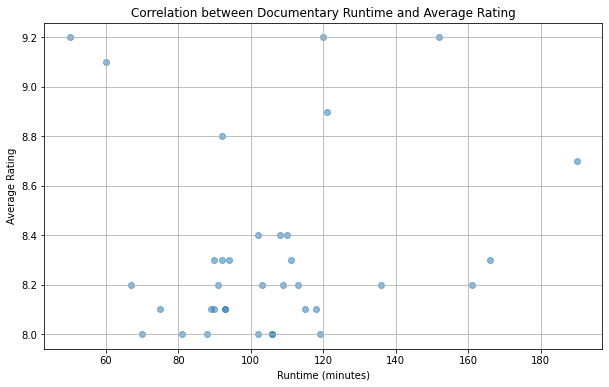

In [114]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(joined_tables_df['runtime_minutes'], joined_tables_df['averagerating'], alpha=0.5)
plt.title('Correlation between Documentary Runtime and Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [116]:
# correlation coefficient is 0.09 meaning that there is a weak relationship between documentary runtime and average rating, supporting our original conclusion
correlation_coefficient = joined_tables_df['runtime_minutes'].corr(joined_tables_df['averagerating'])
correlation_coefficient

0.09180660818511564